# Análisis Exploratorio

### Carga de librerías necesarias

In [1]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

### Carga del Dataset

In [2]:
# Ruta del dataset (Reemplázala si tienes el archivo en otra ubicación)
data_path = "../data/train.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(data_path)

# Mostrar las dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Mostrar las primeras filas para inspección inicial
print("\nPrimeras filas del dataset:")
print(df.head())

Dimensiones del dataset: (1460, 81)

Primeras filas del dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  Y

### Inspección inicial del dataset

In [3]:
# Mostrar información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# Mostrar resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    146

### Detección de valores nulos

In [4]:
# Verificar valores nulos en cada columna
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrar solo las columnas con valores nulos

# Mostrar las columnas con valores nulos y la cantidad de datos faltantes
print("\nValores nulos en el dataset:")
print(missing_values.sort_values(ascending=False))


Valores nulos en el dataset:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


### Análisis de la variable objetivo (SalePrice)

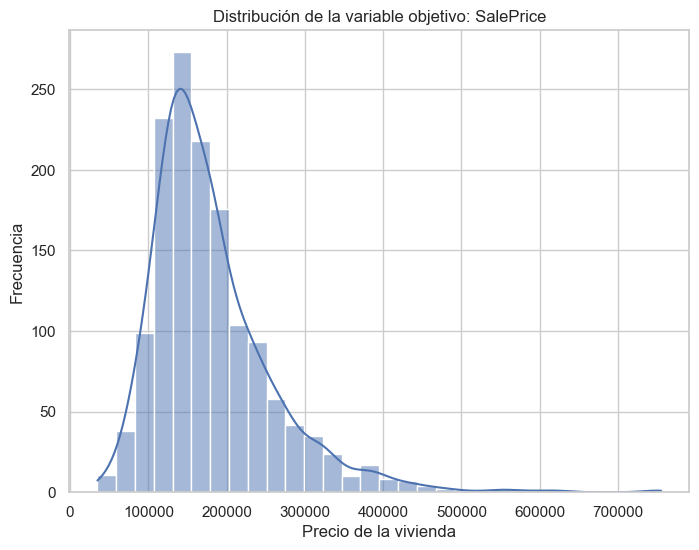

In [5]:
# Visualizar la distribución de la variable objetivo (SalePrice)
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribución de la variable objetivo: SalePrice")
plt.xlabel("Precio de la vivienda")
plt.ylabel("Frecuencia")
plt.show()

### Análisis de correlaciones entre variables

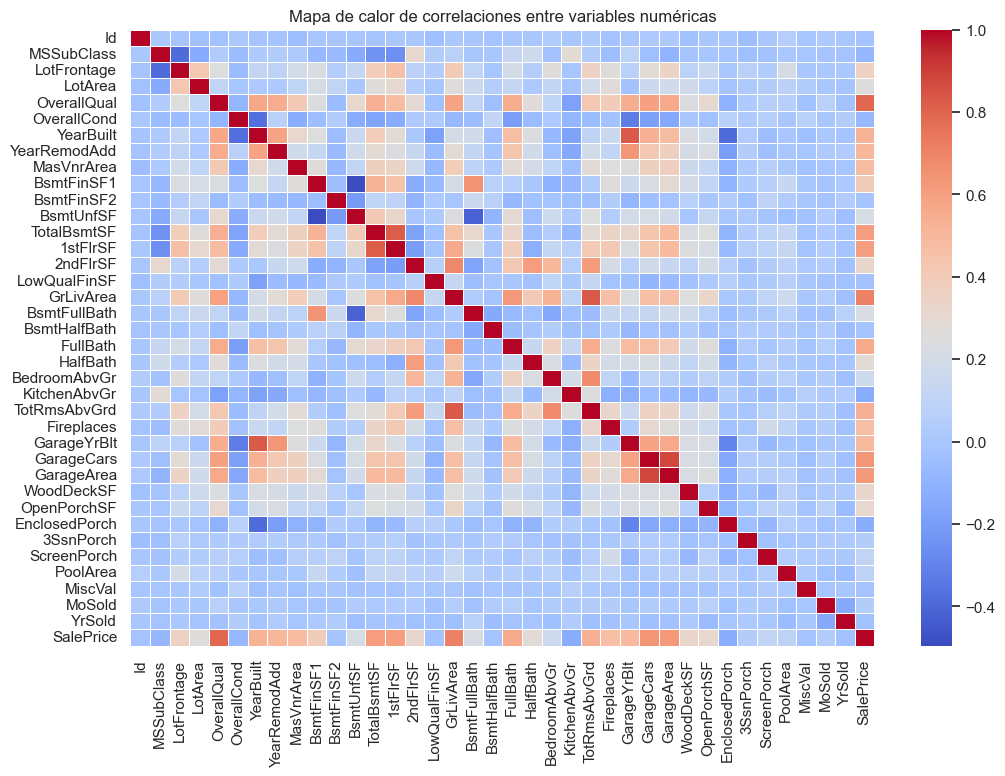

In [7]:
# Filtrar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Visualizar correlaciones entre variables con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

### Detección de valores atípicos (Outliers)

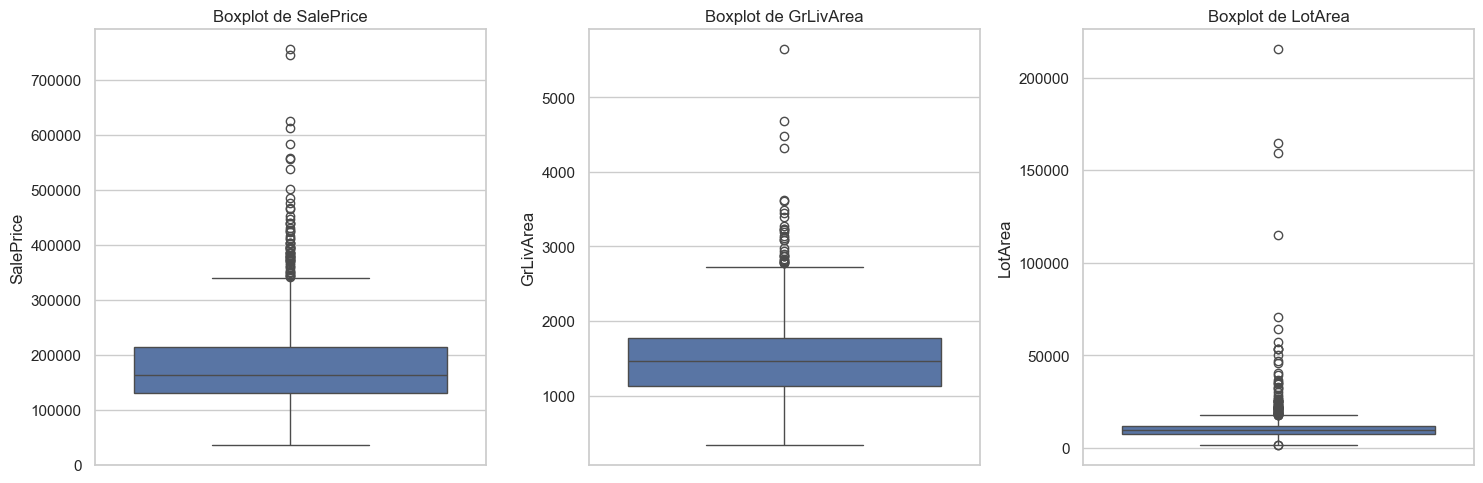

In [8]:
# Identificación de valores atípicos con boxplots
plt.figure(figsize=(15, 5))

# Variables clave que podrían tener outliers
variables_outliers = ['SalePrice', 'GrLivArea', 'LotArea']

for i, var in enumerate(variables_outliers, 1):
    plt.subplot(1, len(variables_outliers), i)
    sns.boxplot(y=df[var])
    plt.title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

### Análisis de relaciones entre variables y SalePrice

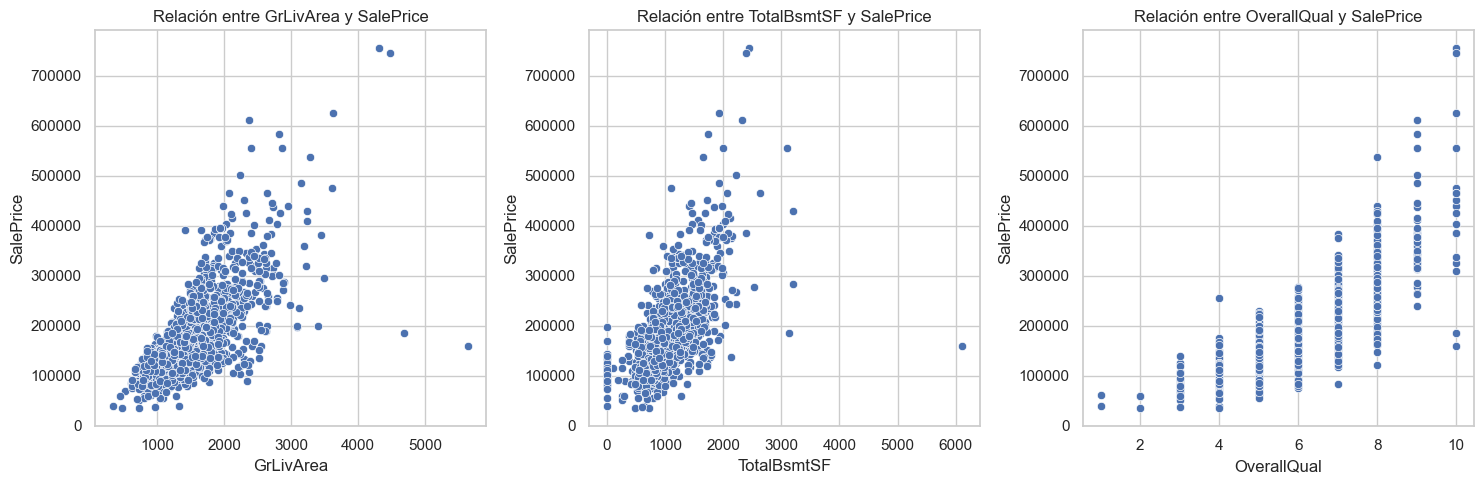

In [9]:
# Variables que podrían tener relación con el precio de la vivienda
variables_relacion = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables_relacion, 1):
    plt.subplot(1, len(variables_relacion), i)
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(f"Relación entre {var} y SalePrice")

plt.tight_layout()
plt.show()

### Análisis de normalidad de SalePrice

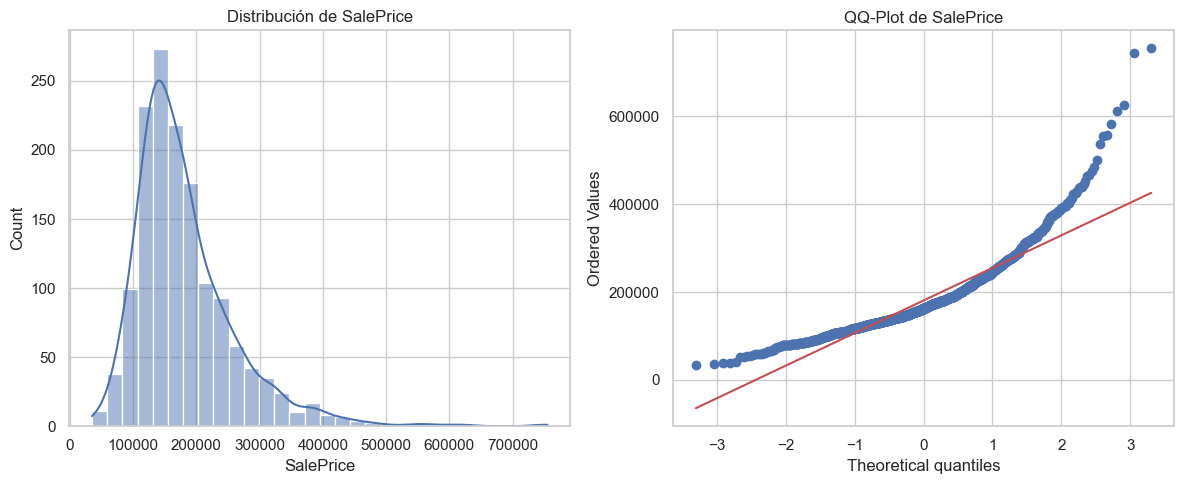

In [10]:
# Histograma y gráfico de probabilidad normal (QQ-Plot) para SalePrice
from scipy import stats

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribución de SalePrice")

plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title("QQ-Plot de SalePrice")

plt.tight_layout()
plt.show()

##### Transformación logarítmica:

SalePrice no es normal y tiene una fuerte asimetría positiva.

Por lo tanto se aplica una transformación logarítmica para reducir la asimetría y mejorar la normalidad.

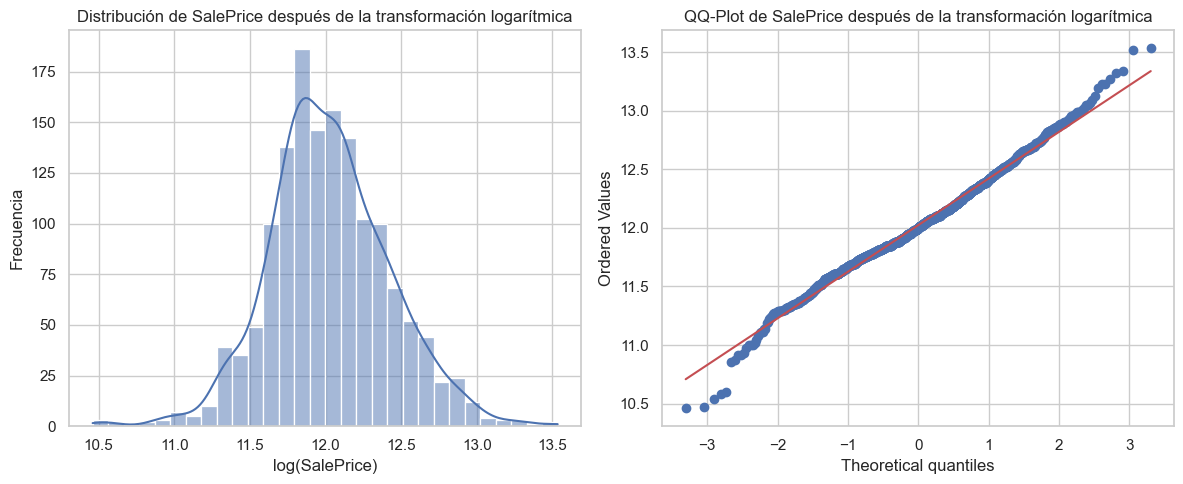

Asimetría antes de la transformación: 1.8828757597682129
Asimetría después de la transformación: 0.12133506220520406


In [17]:
# Aplicar la transformación logarítmica
df['SalePrice_log'] = np.log(df['SalePrice'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice_log'], kde=True, bins=30)
plt.title("Distribución de SalePrice después de la transformación logarítmica")
plt.xlabel("log(SalePrice)")
plt.ylabel("Frecuencia")

# Graficar el QQ-Plot para confirmar normalidad
plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice_log'], dist="norm", plot=plt)
plt.title("QQ-Plot de SalePrice después de la transformación logarítmica")

plt.tight_layout()
plt.show()

# Verificar si la transformación eliminó la asimetría
print("Asimetría antes de la transformación:", df['SalePrice'].skew())
print("Asimetría después de la transformación:", df['SalePrice_log'].skew())

# Variable objetivo transformada
y = df['SalePrice_log']


### Identificación de multicolinealidad (Variables altamente correlacionadas)

In [ ]:
# Ignorar la advertencia para que no aparezca en la salida
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Eliminar filas con valores NaN en las variables numéricas antes de calcular VIF
numerical_df = df.select_dtypes(include=['number']).drop(columns=['Id', 'SalePrice'])

# Rellenar valores nulos con la media de cada columna
numerical_df = numerical_df.fillna(numerical_df.mean())

# Verificar que ya no hay valores NaN
print("Valores nulos después de la limpieza:")
print(numerical_df.isnull().sum().sum())  # Debe dar 0


Valores nulos después de la limpieza:
0


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Crear DataFrame para almacenar los VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

# Mostrar variables con alta multicolinealidad
print("Variables con alta multicolinealidad (VIF > 10):")
print(vif_data[vif_data["VIF"] > 10])

Variables con alta multicolinealidad (VIF > 10):
        Variable           VIF
1    LotFrontage  1.746100e+01
3    OverallQual  6.661049e+01
4    OverallCond  4.165451e+01
5      YearBuilt  2.137223e+04
6   YearRemodAdd  2.240954e+04
8     BsmtFinSF1           inf
9     BsmtFinSF2           inf
10     BsmtUnfSF           inf
11   TotalBsmtSF           inf
12      1stFlrSF           inf
13      2ndFlrSF           inf
14  LowQualFinSF           inf
15     GrLivArea           inf
18      FullBath  2.667373e+01
20  BedroomAbvGr  3.108831e+01
21  KitchenAbvGr  3.751478e+01
22  TotRmsAbvGrd  8.344349e+01
24   GarageYrBlt  2.290578e+04
25    GarageCars  3.675316e+01
26    GarageArea  3.223857e+01
35        YrSold  2.411126e+04
